In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error

In [3]:
##filter warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
hospital_df = pd.read_csv(r'D:\Data Analyst Boot Camp\Assignment Data\Assignment 6\Datasets\hospital-info.csv')
hospital_df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [5]:
hospital_df.describe()

,Provider ID,ZIP Code,Phone Number,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
count,3057.000000,3057.000000,3.057000e+03,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,...,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,261817.891397,51757.296696,5.913678e+09,3.025842,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,...,-0.963980,-0.871177,-0.986907,-0.842215,-8.697796,-2.937054,-4.716686,-2.965375,-39.967077,-9.146034
std,159800.930561,27935.174759,2.383292e+09,0.869600,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,...,0.644294,0.449185,0.669359,0.485605,9.039672,5.102808,1.618808,1.422932,4.684942,4.802502
min,10001.000000,613.000000,9.369338e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.216000,-4.819000,-7.017000,-3.741000,-76.200000,-56.300000,-13.600000,-14.000000,-63.400000,-64.300000
25%,110089.000000,30223.000000,3.607345e+09,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,-1.065000,-0.871177,-0.987212,-1.110000,-9.900000,-2.936245,-5.200000,-3.200000,-39.964766,-10.100000
50%,260022.000000,48617.000000,6.072744e+09,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-0.963980,-0.871177,-0.987212,-0.841970,-6.100000,-1.100000,-4.716942,-2.964405,-39.964766,-8.900000
75%,390142.000000,76017.000000,8.059556e+09,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,-0.630000,-0.871177,-0.712000,-0.554000,-3.400000,-0.200000,-4.000000,-2.200000,-39.964766,-6.600000
max,670098.000000,99801.000000,9.898943e+09,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-14.900000,-0.000000


In [6]:
hospital_df.dropna()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,670085,TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE,10864 TEXAS HEALTH TRAIL,FORT WORTH,TX,76244,TARRANT,6822122000,Voluntary,Yes,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,670088,BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE S...,700 SCOTT & WHITE DRIVE,COLLEGE STATION,TX,77845,BRAZOS,9796913701,Voluntary,Yes,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,670092,WALNUT HILL MEDICAL CENTER,7502 GREENVILLE AVENUE,DALLAS,TX,75231,DALLAS,9728636000,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,670096,"BAY AREA REGIONAL MEDICAL CENTER, LLC",200 BLOSSOM STREET,WEBSTER,TX,77598,HARRIS,2815257000,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


In [7]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

In [8]:
corr_matrix = hospital_df.corr()
corr_matrix

,Provider ID,ZIP Code,Phone Number,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
Provider ID,1.000000,-0.154260,0.051068,0.083291,-0.044014,-0.016370,0.057595,0.107878,-0.001840,0.104286,...,0.037679,0.016113,0.048542,0.027699,0.014216,0.037879,-0.011798,0.057830,0.007425,0.030775
ZIP Code,-0.154260,1.000000,0.019941,0.118013,-0.077220,0.032525,0.223948,0.027707,-0.030054,0.110721,...,-0.010976,0.021001,0.036055,-0.046681,-0.080930,-0.085079,0.112241,0.108931,-0.135821,0.163934
Phone Number,0.051068,0.019941,1.000000,-0.011639,0.015539,0.022516,0.005442,-0.009052,0.022953,0.024451,...,0.025748,0.005815,0.004189,-0.043259,0.003405,-0.048225,0.007599,0.012990,0.009927,-0.005305
Hospital overall rating,0.083291,0.118013,-0.011639,1.000000,0.222774,0.421701,0.503575,0.586112,0.101060,0.263083,...,0.039365,0.022805,0.095596,0.065908,0.067477,0.068928,-0.009661,0.156579,0.003354,0.037647
Mortality national comparison,-0.044014,-0.077220,0.015539,0.222774,1.000000,-0.015789,-0.092562,-0.003655,0.031659,-0.110332,...,-0.034640,-0.014273,0.011261,-0.088842,0.003889,0.017072,-0.076168,-0.009422,0.081817,-0.095273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MED_OP_11_Score,0.037879,-0.085079,-0.048225,0.068928,0.017072,-0.018231,0.044463,0.024680,0.130499,-0.071694,...,-0.037697,-0.004914,0.028933,-0.094220,0.413812,1.000000,-0.039785,0.007223,0.051976,-0.023417
MED_OP_13_Score,-0.011798,0.112241,0.007599,-0.009661,-0.076168,0.016507,0.041146,-0.035663,-0.008504,-0.008116,...,0.015843,-0.019413,-0.015111,0.029001,-0.001185,-0.039785,1.000000,0.010533,-0.020506,0.024700
MED_OP_14_Score,0.057830,0.108931,0.012990,0.156579,-0.009422,0.019020,0.170760,0.147043,0.010467,0.046782,...,0.015368,-0.004078,0.078486,-0.005951,-0.020871,0.007223,0.010533,1.000000,0.065224,0.070717
MED_OP_8_Score,0.007425,-0.135821,0.009927,0.003354,0.081817,-0.001101,-0.029643,0.015487,0.023701,-0.082555,...,-0.048103,-0.024018,0.023825,-0.032626,0.055954,0.051976,-0.020506,0.065224,1.000000,-0.025972


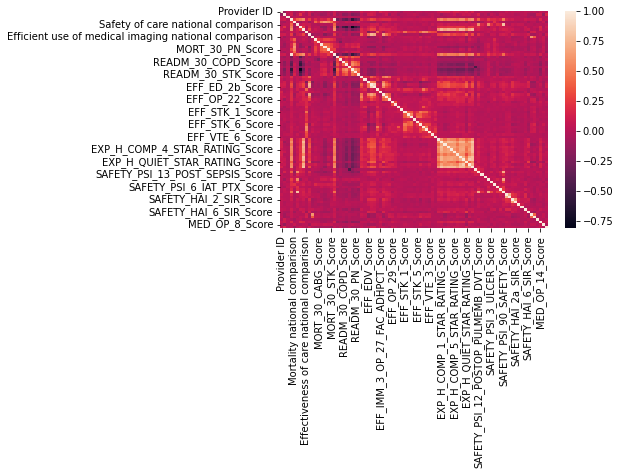

In [9]:
sns.heatmap(hospital_df.corr(method = 'pearson', min_periods =10))
plt.show()

<AxesSubplot:ylabel='Frequency'>

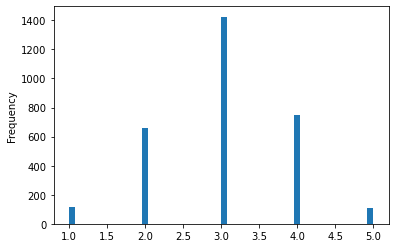

In [10]:
#Find the distribution of the hospital's overall ratings.
hospital_df['Hospital overall rating'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Frequency'>

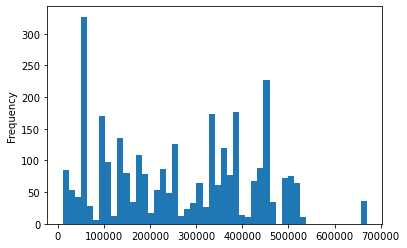

In [11]:
#Find the distribution of the
hospital_df['Provider ID'].plot.hist(bins = 50)

<AxesSubplot:ylabel='Frequency'>

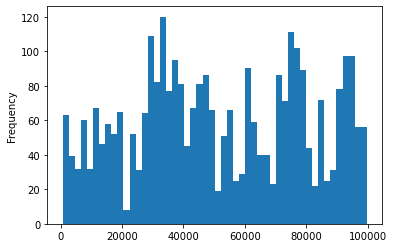

In [12]:
hospital_df['ZIP Code'].plot.hist(bins = 50)

In [13]:
#Map the ratings using lambda
rating = hospital_df['Hospital overall rating']
rating.map(lambda value:value +1)

0       4
1       4
2       3
3       4
4       4
       ..
3052    5
3053    4
3054    4
3055    4
3056    4
Name: Hospital overall rating, Length: 3057, dtype: int64

In [14]:
#Prepare data for machine learning model.


In [15]:
#Remove all demographic columns as well as unnecessary features from the dataset
hospital_df2 = hospital_df.drop(['Provider ID','Hospital Name','Address','City','State','ZIP Code','County Name','Phone Number'], axis = 'columns')
hospital_df2

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,Voluntary,Yes,4,1,1,1,1,2,1,1,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,Voluntary,Yes,3,1,1,1,2,1,2,1,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,Others,Yes,3,1,1,1,0,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,Others,Yes,3,1,1,2,0,0,1,1,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


In [16]:
hospital_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Hospital Ownership                                    3057 non-null   object 
 1   Emergency Services                                    3057 non-null   object 
 2   Hospital overall rating                               3057 non-null   int64  
 3   Mortality national comparison                         3057 non-null   int64  
 4   Safety of care national comparison                    3057 non-null   int64  
 5   Readmission national comparison                       3057 non-null   int64  
 6   Patient experience national comparison                3057 non-null   int64  
 7   Effectiveness of care national comparison             3057 non-null   int64  
 8   Timeliness of care national comparison                3057

In [17]:
hospital_df2["Hospital overall rating"] = hospital_df2["Hospital overall rating"].astype("int")
hospital_df2["Mortality national comparison"] = hospital_df2["Mortality national comparison"].astype("int")
hospital_df2["Safety of care national comparison"] = hospital_df2["Safety of care national comparison"].astype("int")
hospital_df2["Readmission national comparison"] = hospital_df2["Readmission national comparison"].astype("int")
hospital_df2["Patient experience national comparison"] = hospital_df2["Patient experience national comparison"].astype("int")
hospital_df2["Effectiveness of care national comparison"] = hospital_df2["Effectiveness of care national comparison"].astype("int")
hospital_df2["Timeliness of care national comparison"] = hospital_df2["Timeliness of care national comparison"].astype("int")
hospital_df2["Efficient use of medical imaging national comparison"] = hospital_df2["Efficient use of medical imaging national comparison"].astype("int")

In [18]:

#Ensure Python reads the non-categorical variables as categorical
non_categorical_columns = ['Hospital overall rating','Mortality national comparison','Safety of care national comparison', ]
for column in hospital_df2.columns:
    if column not in non_categorical_columns:
        hospital_df2[column] = pd.Categorical(hospital_df2[column])

In [19]:
#Convert the hospital rating to binary numbers so that "1,2,3" = 0 and "4,5" = 1.
hospital_df2["Hospital overall rating"].replace([5, 4], 1, inplace = True)
hospital_df2["Hospital overall rating"].replace([3,2,1], 0, inplace =True)

In [20]:
#Store predictors and the target variables x and y.
y = hospital_df2['Hospital overall rating']
x = hospital_df2.iloc[:,:-1]

#Create dummy variables for categorical columns.
x = pd.get_dummies(x, drop_first = False)

#Split data into training data and validation data
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state = 0)



In [21]:
#Standardize numerical columns 
scaler = StandardScaler()


The highest rating is a K=1


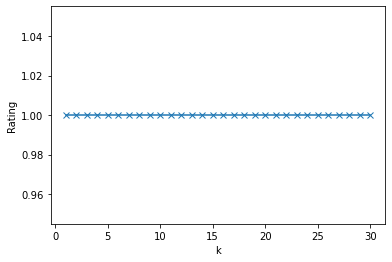

In [22]:
kvalues = np.arange(1,31)
                   
val_acc= []
for k in kvalues:
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(x_train, y_train)
    y_pred = knn_clf.predict(x_val)
    val_acc.append(accuracy_score(y_val, y_pred))

#plot accruacy
plt.plot(kvalues, val_acc, marker = 'x')
plt.xlabel("k")
plt.ylabel("Rating")

print("The highest rating is a K="+str(np.argmax(val_acc)+1))

In [23]:
knn_clf_best = KNeighborsClassifier(n_neighbors = 3)
knn_clf_best.fit(x_train, y_train)
y_pred = knn_clf.predict(x_val)

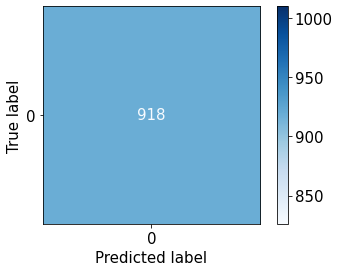

In [24]:
plt.rcParams.update({'font.size':15})
ConfusionMatrixDisplay.from_estimator(
    knn_clf_best,
    x_val,
    y_val,
    cmap = plt.cm.Blues)


In [25]:
knn_clf=KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,31)}

#find the best k
grid = GridSearchCV(knn_clf, param_grid, cv = 5, scoring ='accuracy', return_train_score = True, verbose = 1)
grid_search = grid.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_neighbors': 1}

Text(0, 0.5, 'Accuracy')

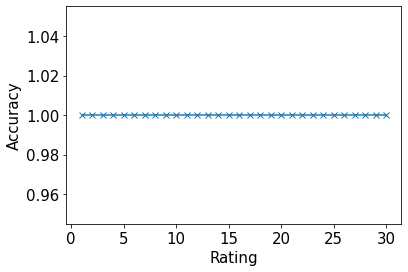

In [26]:
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker = 'x')
plt.xlabel("Rating")
plt.ylabel("Accuracy")

In [27]:
#Decision Tree Model


In [28]:
tree_clf = DecisionTreeClassifier(random_state = 0, max_depth = 20)
tree_clf.fit(x_train, y_train)                        

DecisionTreeClassifier(max_depth=20, random_state=0)

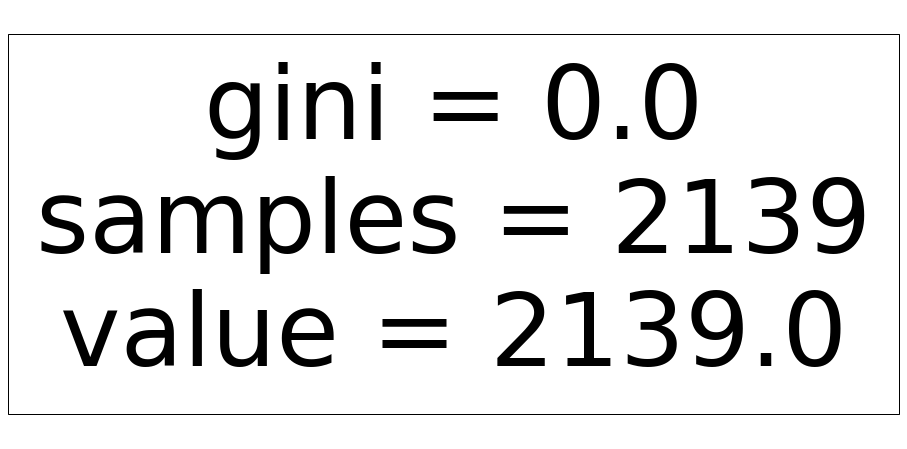

In [29]:
fig = plt.figure(figsize = (16, 8))
fig = tree.plot_tree(tree_clf, feature_names = x.columns, filled = True)

In [30]:
print('Number of leaves=', tree_clf.get_n_leaves())
print('Tree depth=', tree_clf.get_depth())

Number of leaves= 1
Tree depth= 0


In [31]:
path= tree_clf.cost_complexity_pruning_path(x_train, y_train) 
ccp_alpha = path.ccp_alphas
print(ccp_alpha)


[0.]


In [32]:
clfs = []
for ccp_alpha in ccp_alpha:
    curr_clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    curr_clf.fit(x_train, y_train)

    clfs.append(curr_clf)

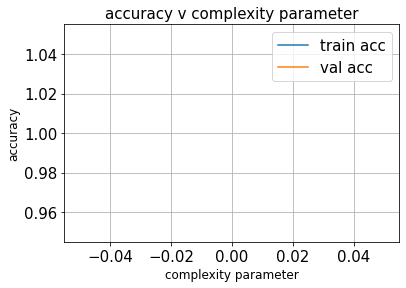

In [33]:
#Study accuracy on training and validation data
train_acc= []
val_acc= []

#Loop through models
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_val_pred = c.predict(x_val)

train_acc.append(accuracy_score(y_train_pred, y_train))
val_acc.append(accuracy_score(y_val_pred, y_val))

plt.figure(figsize = (6,4))
plt.plot(ccp_alpha, train_acc, label = 'train acc', drawstyle = 'steps-post')
plt.plot(ccp_alpha, val_acc, label = 'val acc', drawstyle = 'steps-post')
plt.legend()
plt.xlabel('complexity parameter', fontsize = 12)
plt.ylabel('accuracy', fontsize = 12)
plt.title('accuracy v complexity parameter', fontsize = 15)
plt.grid()
plt.show()

In [34]:
hospital_unrated = pd.read_csv(r'D:\Data Analyst Boot Camp\Assignment Data\Assignment 6\not_yet_rated.csv')
hospital_unrated

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957
5,370037,Voluntary,Yes,1,2,0,1,1,1,0,...,-0.41000,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000


In [35]:
df_dummies = pd.get_dummies(hospital_unrated, columns = ['Mortality national comparison','Safety of care national comparison','Patient experience national comparison'])
df_dummies.head()

,Provider ID,Hospital Ownership,Emergency Services,Readmission national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,...,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score,Mortality national comparison_1,Mortality national comparison_2,Safety of care national comparison_1,Safety of care national comparison_2,Patient experience national comparison_0,Patient experience national comparison_1,Patient experience national comparison_2
0,520139,Voluntary,Yes,2,2,2,1,-12.500000,-3.331371,-8.2,...,-2.900000,-41.000000,-6.100000,1,0,1,0,0,0,1
1,520189,Government,Yes,2,2,2,1,-13.800000,-3.331371,-8.1,...,-1.900000,-41.100000,-5.300000,0,1,1,0,0,0,1
2,370029,Government,No,1,1,2,1,-14.054091,-3.331371,-7.9,...,-2.964405,-39.964766,-8.300000,1,0,1,0,0,1,0
3,370032,Others,Yes,1,1,1,1,-15.700000,-3.400000,-7.9,...,-4.500000,-53.200000,-10.500000,1,0,0,1,1,0,0
4,370036,Government,Yes,1,0,2,1,-14.054091,-3.331371,-7.1,...,0.000000,-39.964766,-9.144957,1,0,1,0,0,1,0


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [37]:
#Split data into training and validation sets using 30% of the data as validation, random state = 0.
x_train,x_val,y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [38]:
tree_clf = DecisionTreeClassifier(random_state = 0, max_depth = 20)
tree_clf.fit(x_train, y_train)   

DecisionTreeClassifier(max_depth=20, random_state=0)

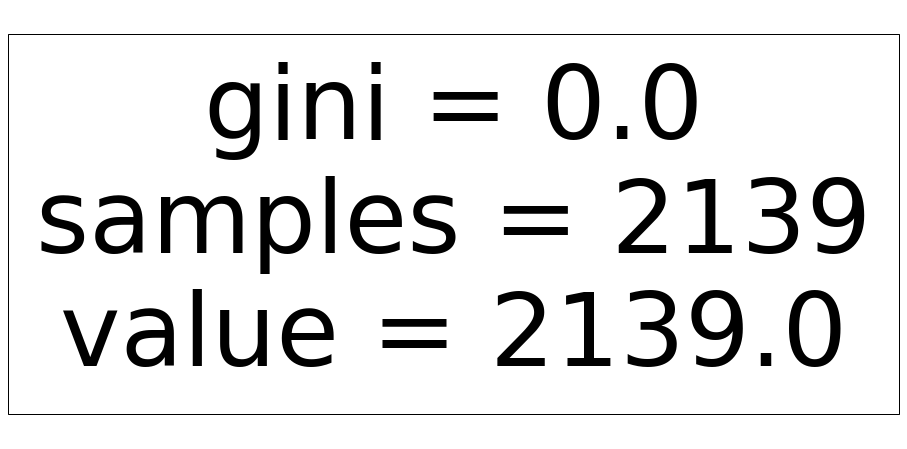

In [39]:
fig = plt.figure(figsize = (16, 8))
fig = tree.plot_tree(tree_clf, feature_names = x.columns, filled = True)

In [40]:
print('Number of leaves=', tree_clf.get_n_leaves())
print('Tree depth=', tree_clf.get_depth())

Number of leaves= 1
Tree depth= 0


In [41]:
path= tree_clf.cost_complexity_pruning_path(x_train, y_train) 
ccp_alpha = path.ccp_alphas
print(ccp_alpha)

[0.]


In [42]:
clfs = []
for ccp_alpha in ccp_alpha:
    curr_clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    curr_clf.fit(x_train, y_train)

    clfs.append(curr_clf)

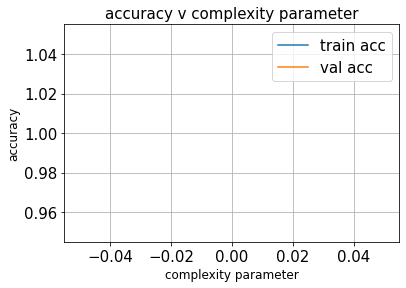

In [43]:
#Study accuracy on training and validation data
train_acc= []
val_acc= []

#Loop through models
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_val_pred = c.predict(x_val)

train_acc.append(accuracy_score(y_train_pred, y_train))
val_acc.append(accuracy_score(y_val_pred, y_val))

plt.figure(figsize = (6,4))
plt.plot(ccp_alpha, train_acc, label = 'train acc', drawstyle = 'steps-post')
plt.plot(ccp_alpha, val_acc, label = 'val acc', drawstyle = 'steps-post')
plt.legend()
plt.xlabel('complexity parameter', fontsize = 12)
plt.ylabel('accuracy', fontsize = 12)
plt.title('accuracy v complexity parameter', fontsize = 15)
plt.grid()
plt.show()

In [44]:
rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, class_weight = 'balanced', random_state = 0) 
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       random_state=0)

In [45]:
rfimp = rf.feature_importances_
rfimp

array([0., 0., 0., ..., 0., 0., 0.])

<AxesSubplot:xlabel='Importances', ylabel='Rating'>

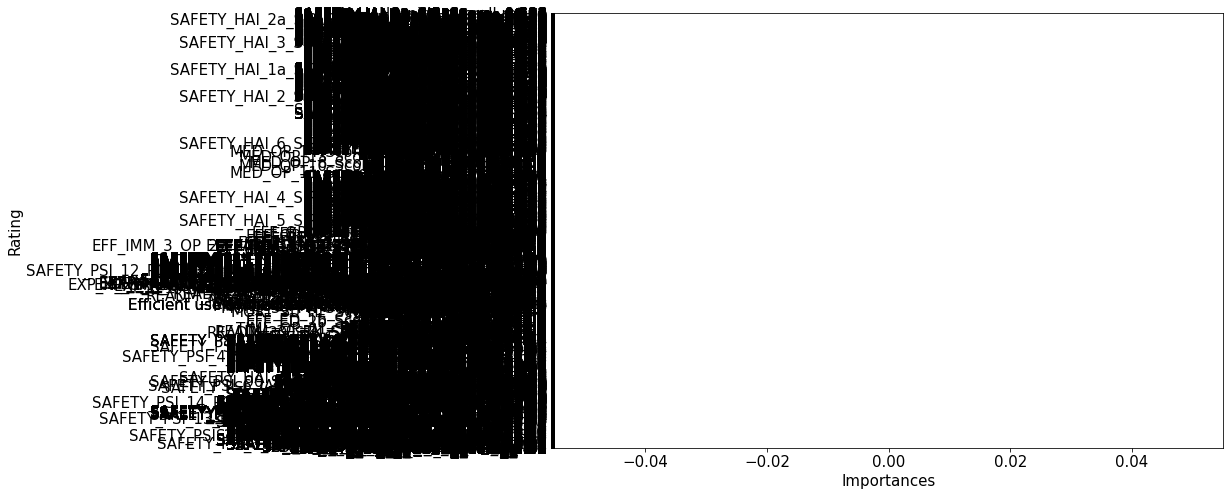

In [46]:
#Visualize the feature importances
plt.figure(figsize = (12,8))
rfimpdf = pd.DataFrame(data = {'Rating':x_train.columns,'Importances':rfimp})
rfimpdf = rfimpdf.sort_values(by = 'Importances', ascending = False)
sns.barplot(data = rfimpdf, x = 'Importances', y = 'Rating')

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix

In [48]:
sgd_clf = SGDClassifier(random_state = 0)

In [49]:
#Compute accuracy score on the training and validation data for the unrated hospitals.
y_train_pred = rf.predict(x_train)
y_val_pred = rf.predict(x_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print('Accuracy on the training data = {}'.format(train_acc))
print('Accurancy on the training data = {}'.format(val_acc))

Accuracy on the training data = 1.0
Accurancy on the training data = 1.0


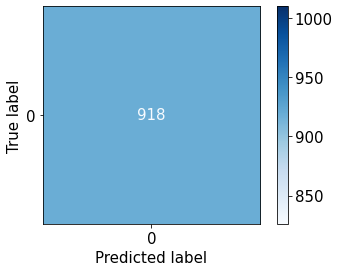

In [51]:
plt.rcParams.update({'font.size':15})
ConfusionMatrixDisplay.from_estimator(
    knn_clf_best,
    x_val,
    y_val,
    cmap = plt.cm.Blues)